In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns

In [16]:
warnings.filterwarnings('ignore')

In [18]:
data = pd.read_csv('Car Purchase Amount Predictions.csv',error_bad_lines=False)

b'Skipping line 301: expected 9 fields, saw 10\nSkipping line 302: expected 9 fields, saw 10\nSkipping line 303: expected 9 fields, saw 10\nSkipping line 304: expected 9 fields, saw 10\nSkipping line 305: expected 9 fields, saw 10\nSkipping line 306: expected 9 fields, saw 10\nSkipping line 307: expected 9 fields, saw 10\nSkipping line 308: expected 9 fields, saw 10\nSkipping line 309: expected 9 fields, saw 10\nSkipping line 310: expected 9 fields, saw 10\nSkipping line 311: expected 9 fields, saw 10\nSkipping line 312: expected 9 fields, saw 10\nSkipping line 313: expected 9 fields, saw 10\nSkipping line 314: expected 9 fields, saw 10\nSkipping line 315: expected 9 fields, saw 10\nSkipping line 316: expected 9 fields, saw 10\nSkipping line 317: expected 9 fields, saw 10\nSkipping line 318: expected 9 fields, saw 10\nSkipping line 319: expected 9 fields, saw 10\nSkipping line 320: expected 9 fields, saw 10\nSkipping line 321: expected 9 fields, saw 10\nSkipping line 322: expected 9 fi

In [19]:
data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [20]:
data.tail()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
395,Walter,ligula@Cumsociis.ca,USA,0,41,71942.40291,6995.902524,541670.1016,48901.44342
396,Vanna,Cum.sociis.natoque@Sedmolestie.edu,USA,1,38,56039.49793,12301.456790,360419.0988,31491.41457
397,Pearl,penatibus.et@massanonante.com,USA,1,54,68888.77805,10611.606860,764531.3203,64147.28888
398,Nell,Quisque.varius@arcuVivamussit.net,USA,1,59,49811.99062,14013.034510,337826.6382,45442.15353
399,Marla,Camaron.marla@hotmail.com,USA,1,47,61370.67766,9391.341628,462946.4924,45107.22566


In [21]:
data.shape

(400, 9)

In [22]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 400
Number of Columns 9


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Customer Name          400 non-null object
Customer e-mail        400 non-null object
Country                400 non-null object
Gender                 400 non-null int64
Age                    400 non-null int64
Annual Salary          400 non-null float64
Credit Card Debt       400 non-null float64
Net Worth              400 non-null float64
Car Purchase Amount    400 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 28.2+ KB


#### Check Null Values In The Dataset

In [24]:
data.isnull().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

#### Get Overall Statistics About The Dataset

In [25]:
data.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.50750,46.280000,61925.986150,9648.238523,427517.754893,44032.712967
std,0.50057,7.989755,11604.365904,3612.972845,167230.610919,10605.595362
min,0.00000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.00000,41.000000,54376.000950,7241.822857,299530.597525,37870.606935
50%,1.00000,46.000000,62766.749075,9688.676962,420820.523300,44181.541065
75%,1.00000,52.000000,69532.969028,12043.094520,552314.233650,50761.120382
max,1.00000,70.000000,100000.000000,20000.000000,891439.876100,70878.296640


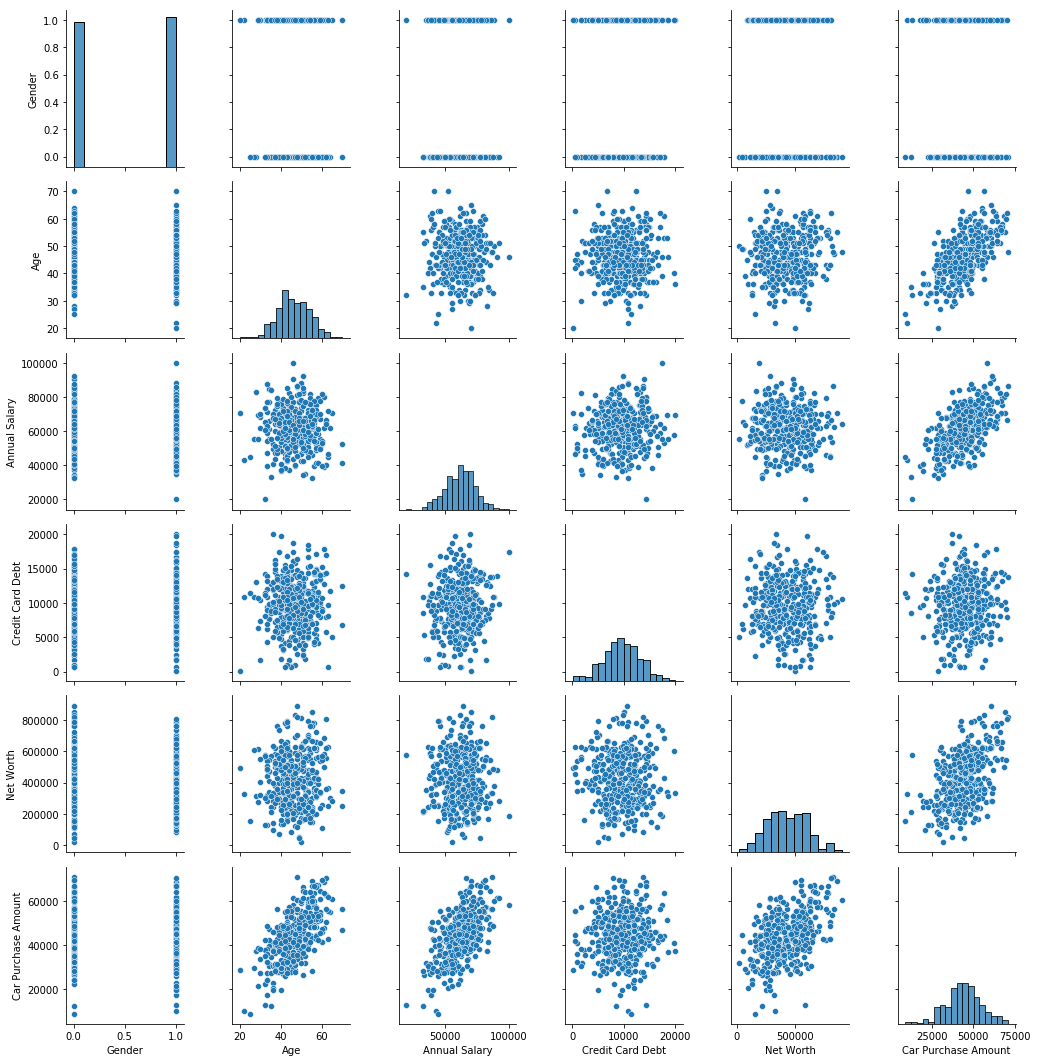

In [26]:
sns.pairplot(data)

#### Store Feature Matrix In X and Response(Target) In Vector y

In [27]:
data.columns

Index(['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

In [28]:
X = data.drop(['Customer Name','Customer e-mail','Country','Car Purchase Amount'],axis=1)

In [29]:
y = data['Car Purchase Amount']

In [30]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
5      56611.99784
6      28925.70549
7      47434.98265
8      48013.61410
9      38189.50601
10     59045.51309
11     42288.81046
12     28700.03340
13     49258.87571
14     49510.03356
15     53017.26723
16     41814.72067
17     43901.71244
18     44633.99241
19     54827.52403
20     51130.95379
21     43402.31525
22     47240.86004
23     46635.49432
24     45078.40193
25     44387.58412
26     37161.55393
27     49091.97185
28     58350.31809
29     43994.35972
          ...     
370    69669.47402
371    48052.65091
372    37364.23474
373    44500.81936
374    35139.24793
375    55167.37361
376    48383.69071
377    35823.55471
378    36517.70996
379    53110.88052
380    53049.44567
381    21471.11367
382    45015.67953
383    55377.87697
384    56510.13294
385    47443.74443
386    41489.64123
387    32553.53423
388    41984.62412
389    59538.40327
390    41352.47071
391    52785

#### Feature Scaling (Normalization)

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
sc = MinMaxScaler()
X_scaled = sc.fit_transform(X)

In [33]:
X_scaled

array([[0.        , 0.44      , 0.53515116, 0.57836085, 0.25126375],
       [0.        , 0.42      , 0.58308616, 0.476028  , 0.58635589],
       [1.        , 0.46      , 0.42248189, 0.55579674, 0.70970723],
       ...,
       [1.        , 0.68      , 0.61110973, 0.52822145, 0.85436912],
       [1.        , 0.78      , 0.37264988, 0.69914746, 0.36471436],
       [1.        , 0.54      , 0.51713347, 0.46690159, 0.50829266]])

In [34]:
sc1 = MinMaxScaler()

In [35]:
y_reshape= y.values.reshape(-1,1)

In [36]:
y_scaled = sc1.fit_transform(y_reshape)

In [37]:
y_scaled

array([[0.42537465],
       [0.58365417],
       [0.54826508],
       [0.9441495 ],
       [0.7581893 ],
       [0.76944584],
       [0.32201445],
       [0.62113834],
       [0.63048946],
       [0.47172446],
       [0.80877328],
       [0.53797231],
       [0.31836742],
       [0.65061383],
       [0.65467273],
       [0.71135228],
       [0.53031067],
       [0.56403803],
       [0.57587223],
       [0.74060739],
       [0.68086803],
       [0.55596739],
       [0.61800118],
       [0.60821801],
       [0.58305422],
       [0.57189008],
       [0.45511198],
       [0.64791654],
       [0.79753841],
       [0.56553528],
       [0.13873313],
       [0.57613675],
       [0.92704383],
       [0.7189833 ],
       [0.49791849],
       [0.68864441],
       [0.48447802],
       [0.01765118],
       [0.43518528],
       [0.74053739],
       [0.59480745],
       [0.52631491],
       [0.30755872],
       [0.30407654],
       [0.96444858],
       [0.96843478],
       [0.40750575],
       [0.466

#### Splitting The Dataset Into The Training Set And Test Set

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_scaled,test_size=0.20,random_state=42)

#### Import The models
#### Model Training

In [45]:
data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [55]:
lr = LinearRegression()
lr.fit(X_train,y_train)

svm = SVR()
svm.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)


gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

xg = XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

#### Building The ANN

In [ ]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

#### Initialize The ANN

In [58]:
ann = Sequential()

NameError: name 'Sequential' is not defined

#### Adding input layer and first hidden layer

In [59]:
ann.add(Dense(25,input_dim=5,activation='relu'))

NameError: name 'ann' is not defined

#### Adding Second hidden layer

In [60]:
ann.add(Dense(25,activation='relu'))

NameError: name 'ann' is not defined

#### Adding the output layer

In [61]:
ann.add(Dense(1,activation='linear'))

NameError: name 'ann' is not defined

#### Training The ANN

In [62]:
ann.summary()

NameError: name 'ann' is not defined

In [63]:
ann.compile(optimizer='adam',loss='mean_squared_error')

NameError: name 'ann' is not defined

In [64]:
ann.fit(X_train,y_train,epochs=100,batch_size=50,verbose=1,validation_split=0.2)

NameError: name 'ann' is not defined

#### Prediction on Test Data

In [65]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gbr.predict(X_test)
y_pred5 = xg.predict(X_test)
y_pred6 = ann.predict(X_test)

NameError: name 'ann' is not defined

#### Evaluating the Algorithm

In [66]:
from sklearn import metrics

In [67]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)
score5 = metrics.r2_score(y_test,y_pred5)
score6 = metrics.r2_score(y_test,y_pred6)

NameError: name 'y_pred6' is not defined

In [68]:
print(score1,score2,score3,score4,score5,score6)

NameError: name 'score6' is not defined

In [69]:
final_data = pd.DataFrame({'Models':['LR','SVR','RF','GBR','XG','ANN'],
              'R2_SCORE':[score1,score2,score3,score4,score5,score6]})

NameError: name 'score6' is not defined

In [70]:
final_data

NameError: name 'final_data' is not defined

In [71]:
sns.barplot(final_data['Models'],final_data['R2_SCORE'])

NameError: name 'final_data' is not defined

#### Save The Model

In [72]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

ModuleNotFoundError: No module named 'tensorflow'

In [73]:
ann = Sequential()

NameError: name 'Sequential' is not defined

In [74]:
ann.add(Dense(25,input_dim=5,activation='relu'))
ann.add(Dense(25,activation='relu'))
ann.add(Dense(1,activation='linear'))

NameError: name 'ann' is not defined

In [75]:
ann.compile(optimizer='adam',loss='mean_squared_error')
ann.fit(X_scaled,y_scaled,epochs=100,batch_size=50,verbose=1)

NameError: name 'ann' is not defined

In [76]:
import joblib

In [77]:
joblib.dump(ann,'car_model')

NameError: name 'ann' is not defined

In [78]:
model = joblib.load('car_model')

FileNotFoundError: [Errno 2] No such file or directory: 'car_model'

#### Prediction on New Data

In [79]:
data.head(1)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.38091,238961.2505,35321.45877


In [80]:
X_test1=sc.transform(np.array([[0,42,62812.09301,11609.38091,238961.2505]]))

In [81]:
X_test1

array([[0.        , 0.44      , 0.53515116, 0.57836085, 0.25126375]])

In [82]:
pred = ann.predict(X_test1)

NameError: name 'ann' is not defined

In [83]:
sc1.inverse_transform(pred)

NameError: name 'pred' is not defined

In [84]:
35321.45877

35321.45877

#### GUI

In [85]:
import numpy as np
from tkinter import *
from sklearn.preprocessing import StandardScaler
import joblib

In [ ]:
def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    
    model = joblib.load('car_model')
    result=model.predict(sc.transform(np.array([[p1,p2,p3,p4,p5]])))
    Label(master, text="Car Purchase amount").grid(row=8)
    Label(master, text=sc1.inverse_transform(result)).grid(row=10)
    print("Car Purchase amount", sc1.inverse_transform(result)[0][0])
    
master = Tk()
master.title("Car Purchase Amount Predictions Using Machine Learning")


label = Label(master, text = "Car Purchase Amount Predictions Using ML"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Gender").grid(row=1)
Label(master, text="Age").grid(row=2)
Label(master, text="Annual Salary").grid(row=3)
Label(master, text="Credit Card Debt").grid(row=4)
Label(master, text="Net Worth").grid(row=5)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)


Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

#### ANN Visualizer

In [ ]:
# pip3 install ann_visualizer
# pip install graphviz

In [ ]:
from ann_visualizer.visualize import ann_viz;

In [ ]:
ann_viz(ann,title="ANN")